<a href="https://colab.research.google.com/github/Aditya1Jhaveri/cervix-cancer-Deep-learning/blob/main/Ensemble_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/Aditya1Jhaveri/cervix-cancer-Deep-learning.git

Cloning into 'cervix-cancer-Deep-learning'...
remote: Enumerating objects: 53321, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 53321 (delta 39), reused 44 (delta 9), pack-reused 53234
Receiving objects: 100% (53321/53321), 1.75 GiB | 37.96 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Updating files: 100% (50900/50900), done.


In [3]:
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,Flatten
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical



# Set your data directories and parameters
train_data_dir = '/content/cervix-cancer-Deep-learning/NEW_DATASET/train'
test_data_dir = '/content/cervix-cancer-Deep-learning/NEW_DATASET/test'
val_data_dir = '/content/cervix-cancer-Deep-learning/NEW_DATASET/validation'


img_width, img_height = 224, 224
batch_size = 16
base_learning_rate = 0.001  # Adjust as needed

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Data preprocessing for validation

val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Data preprocessing for test
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Load the data using data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes labels
    shuffle=True  # Shuffle the data
)
print(f"Found {train_generator.samples} images belonging to {len(train_generator.class_indices)} classes in train dataset.")

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes labels
    shuffle=False  # No need to shuffle test data
)
print(f"Found {test_generator.samples} images belonging to {len(test_generator.class_indices)} classes in test dataset.")

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes labels
    shuffle=False  # No need to shuffle test data
)
print(f"Found {val_generator.samples} images belonging to {len(val_generator.class_indices)} classes in validation dataset.")


Found 12110 images belonging to 7 classes.
Found 12110 images belonging to 7 classes in train dataset.
Found 2083 images belonging to 7 classes.
Found 2083 images belonging to 7 classes in test dataset.
Found 3111 images belonging to 7 classes.
Found 3111 images belonging to 7 classes in validation dataset.


In [4]:
import numpy as np
import tensorflow as tf

# Load the pre-trained models
resnet50v2 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet50V2_model.h5')
resnet101 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet101V2_model.h5')
densenet121 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet121_model.h5')
densenet169 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet169_model.h5')
xceptionnet = tf.keras.models.load_model('/content/drive/MyDrive/Model/XceptionNet_model.h5')
inceptionresnetv2 = tf.keras.models.load_model('/content/drive/MyDrive/Model/InceptionResNetV2_model.h5')


# **ResNet50V2**

In [ ]:
# resnet50v2 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet50V2_model.h5')

In [ ]:
train_loss, train_accuracy = resnet50v2.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 208s 262ms/step - loss: 0.0355 - accuracy: 0.9889
Train accuracy: 0.9889


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = resnet50v2.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 32s 247ms/step - loss: 0.0678 - accuracy: 0.9803
Test accuracy: 0.9803


131/131 [==============================] - 53s 367ms/step


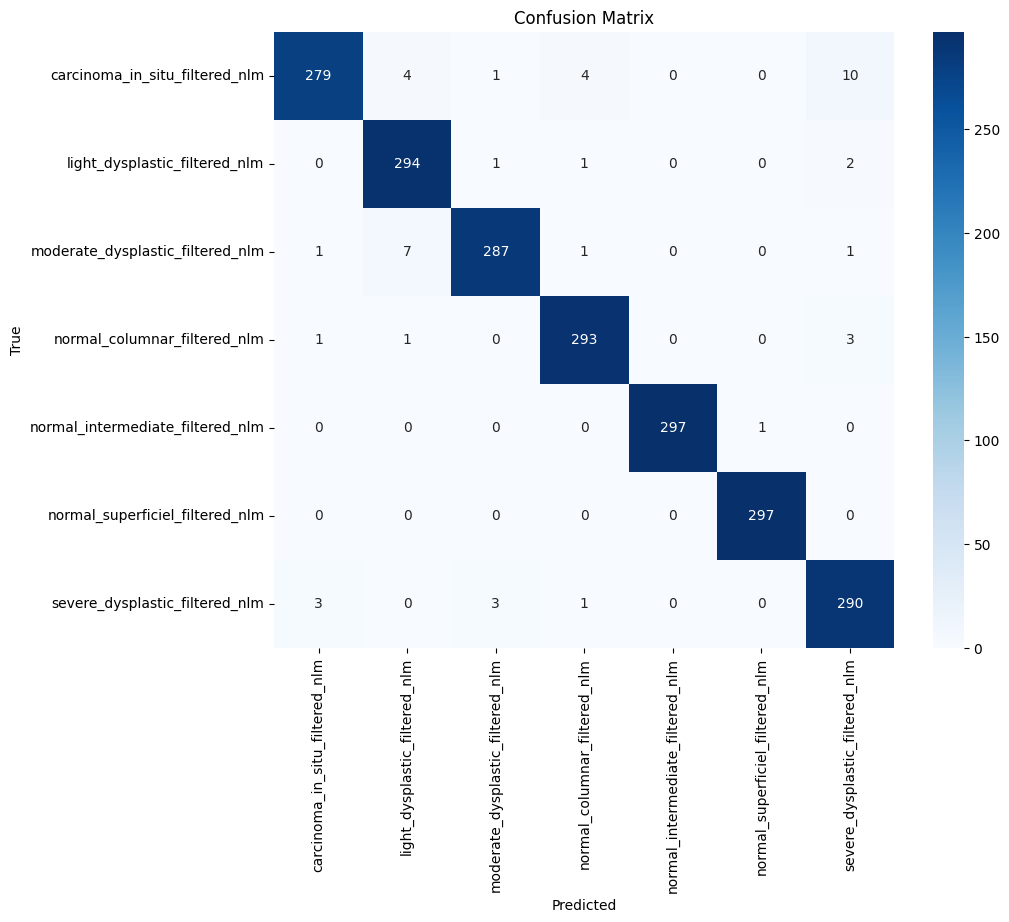

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.982394  0.936242  0.958763
1     light_dysplastic_filtered_nlm   0.960784  0.986577  0.973510
2  moderate_dysplastic_filtered_nlm   0.982877  0.966330  0.974533
3      normal_columnar_filtered_nlm   0.976667  0.983221  0.979933
4  normal_intermediate_filtered_nlm   1.000000  0.996644  0.998319
5   normal_superficiel_filtered_nlm   0.996644  1.000000  0.998319
6    severe_dysplastic_filtered_nlm   0.947712  0.976431  0.961857
True Positives (TP): 294
True Negatives (TN): 279
False Positives (FP): 4
False Negatives (FN): 0
Macro-Averaged Precision: 0.9781541103601106
Macro-Averaged Recall: 0.9779207866456189
Macro-Averaged F1 Score: 0.9778907247045184
Average Accuracy: 0.9930675909878682


In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = resnet50v2.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Extract TP and TN from the confusion matrix
tp = cm[1, 1]  # True Positives (assuming positive class is labeled as 1)
tn = cm[0, 0]  # True Negatives (assuming negative class is labeled as 0)
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives

# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)

# Print TP and TN values
# Print TP, TN, FP, and FN values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)


# Print macro-averaged precision, recall, and F1 score
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1 Score:", macro_f1)

average_accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

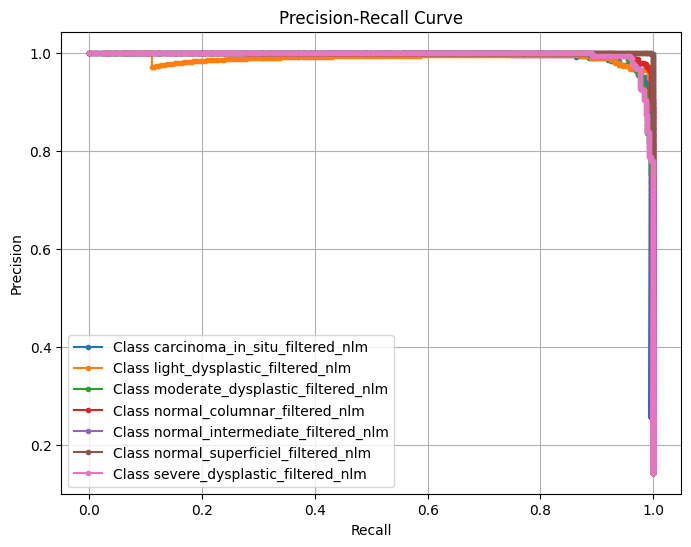

In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve for each class
precision = dict()
recall = dict()
for i in range(len(class_indices)):
    precision[i], recall[i], _ = precision_recall_curve((y_true_classes == i), y_pred[:, i])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(len(class_indices)):
    plt.plot(recall[i], precision[i], marker='.', label='Class {}'.format(class_names[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


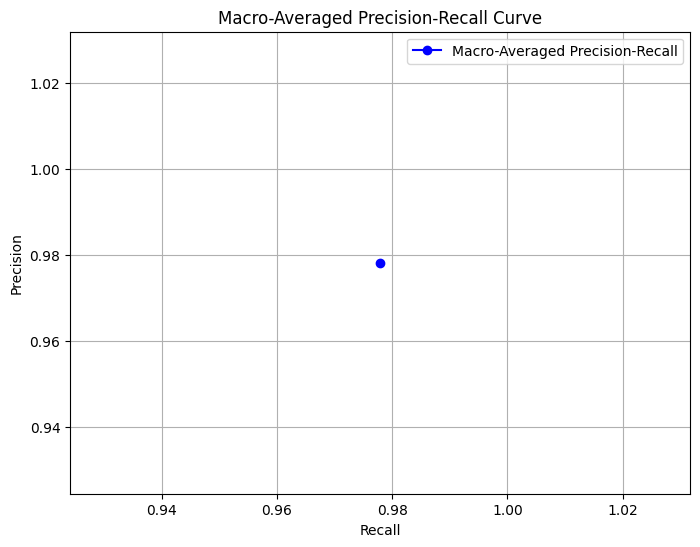

In [9]:
import matplotlib.pyplot as plt

# Plot Macro-Averaged Precision and Macro-Averaged Recall
plt.figure(figsize=(8, 6))
plt.plot([macro_recall], [macro_precision], marker='o', color='blue', label='Macro-Averaged Precision-Recall', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **ResNet101**

In [ ]:
# resnet101 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet101V2_model.h5')

In [ ]:
train_loss, train_accuracy = resnet101.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 207s 272ms/step - loss: 0.0341 - accuracy: 0.9893
Train accuracy: 0.9893


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = resnet101.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 34s 262ms/step - loss: 0.0574 - accuracy: 0.9803
Test accuracy: 0.9803


131/131 [==============================] - 43s 312ms/step


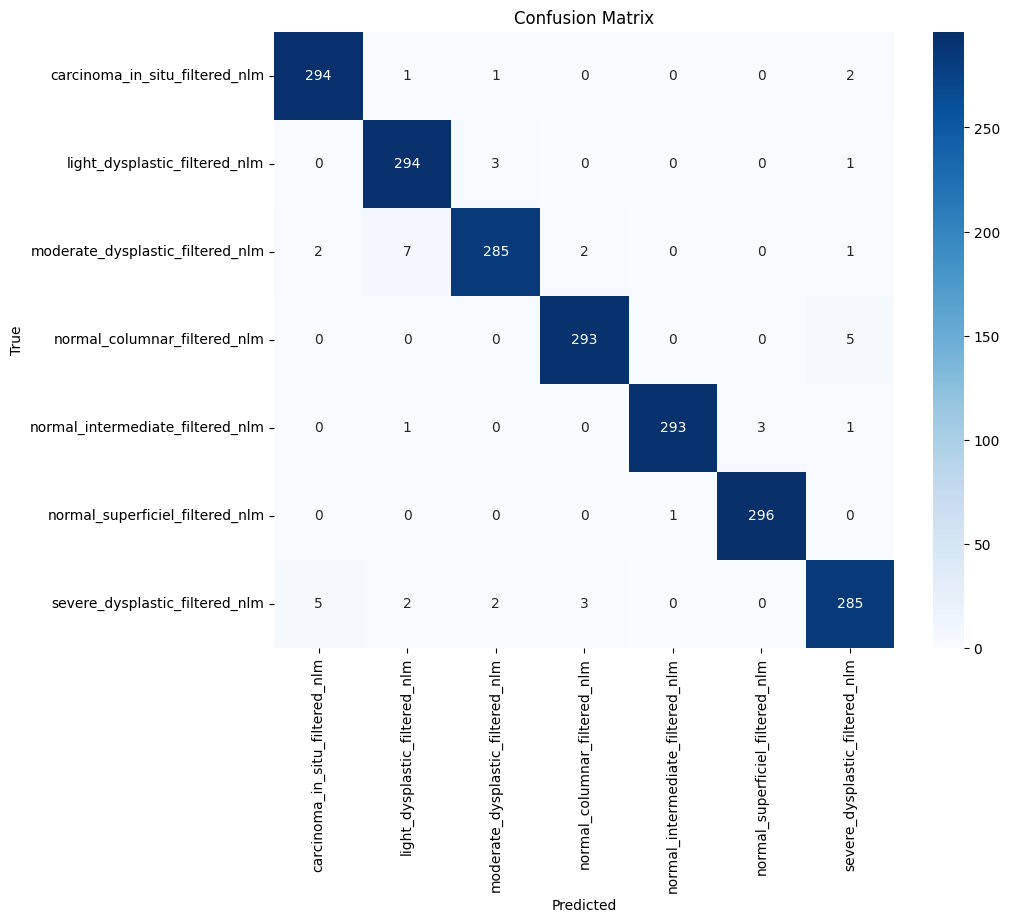

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.976744  0.986577  0.981636
1     light_dysplastic_filtered_nlm   0.963934  0.986577  0.975124
2  moderate_dysplastic_filtered_nlm   0.979381  0.959596  0.969388
3      normal_columnar_filtered_nlm   0.983221  0.983221  0.983221
4  normal_intermediate_filtered_nlm   0.996599  0.983221  0.989865
5   normal_superficiel_filtered_nlm   0.989967  0.996633  0.993289
6    severe_dysplastic_filtered_nlm   0.966102  0.959596  0.962838
True Positives (TP): 294
True Negatives (TN): 294
False Positives (FP): 1
False Negatives (FN): 0
Macro-Averaged Precision: 0.9794212030914341
Macro-Averaged Recall: 0.9793460330373083
Macro-Averaged F1 Score: 0.9793372804469225
Average Accuracy: 0.99830220713073


In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = resnet101.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
tp = cm[1, 1]  # True Positives (assuming positive class is labeled as 1)
tn = cm[0, 0]  # True Negatives (assuming negative class is labeled as 0)
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)
# Print TP, TN, FP, and FN values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Print macro-averaged precision, recall, and F1 score
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1 Score:", macro_f1)

average_accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

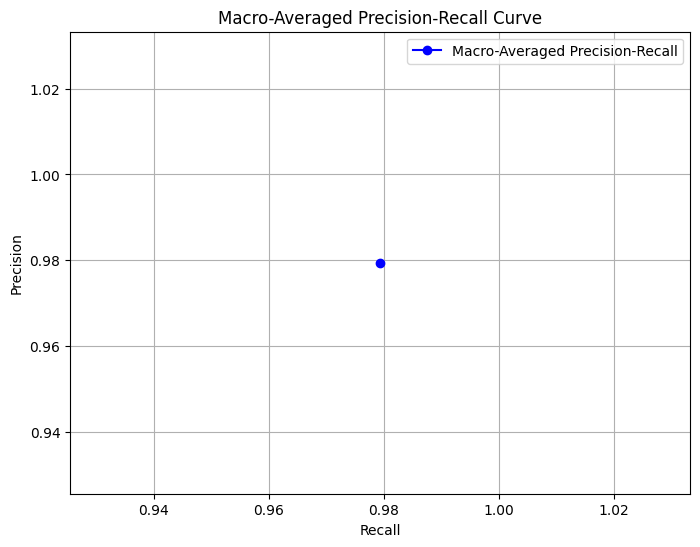

In [11]:
import matplotlib.pyplot as plt

# Plot Macro-Averaged Precision and Macro-Averaged Recall
plt.figure(figsize=(8, 6))
plt.plot([macro_recall], [macro_precision], marker='o', color='blue', label='Macro-Averaged Precision-Recall', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **DenseNet121**

In [ ]:
# densenet121 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet121_model.h5')

In [ ]:
train_loss, train_accuracy = densenet121.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 202s 261ms/step - loss: 0.1793 - accuracy: 0.9340
Train accuracy: 0.9340


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = densenet121.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 35s 266ms/step - loss: 0.2473 - accuracy: 0.9102
Test accuracy: 0.9102


131/131 [==============================] - 62s 433ms/step


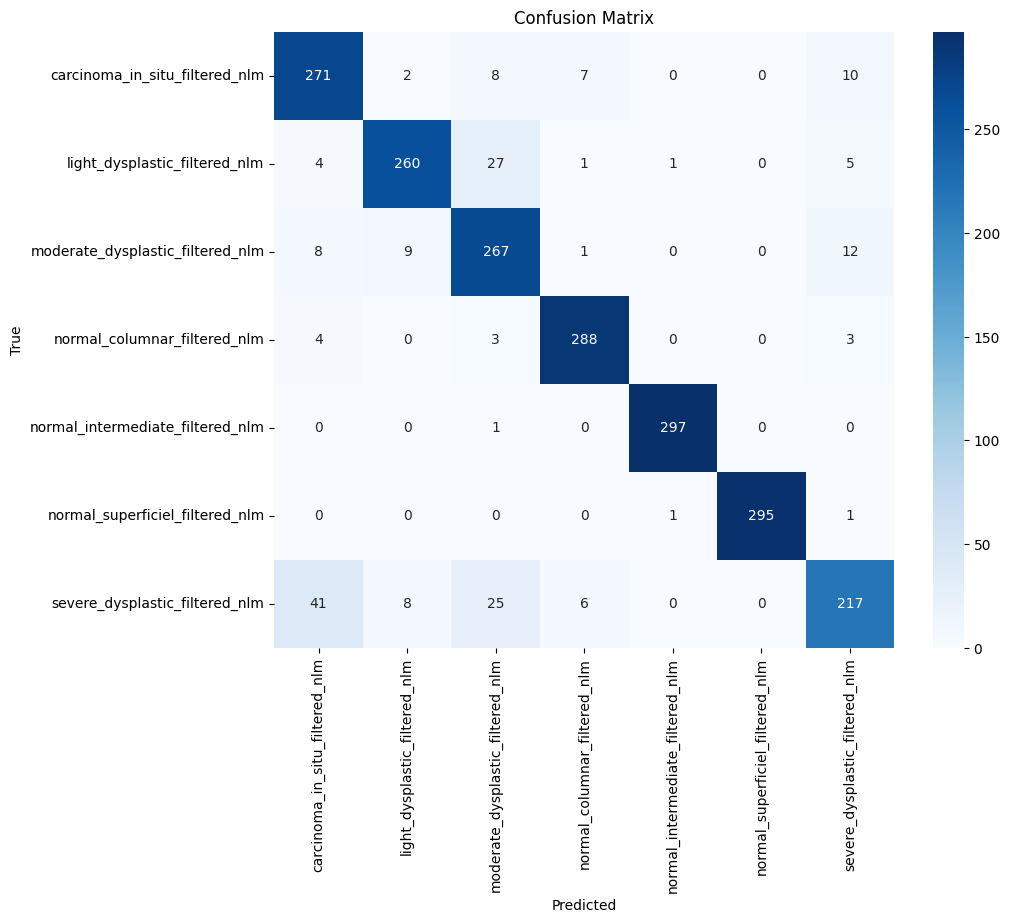

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.826220  0.909396  0.865815
1     light_dysplastic_filtered_nlm   0.931900  0.872483  0.901213
2  moderate_dysplastic_filtered_nlm   0.806647  0.898990  0.850318
3      normal_columnar_filtered_nlm   0.950495  0.966443  0.958403
4  normal_intermediate_filtered_nlm   0.993311  0.996644  0.994975
5   normal_superficiel_filtered_nlm   1.000000  0.993266  0.996622
6    severe_dysplastic_filtered_nlm   0.875000  0.730640  0.796330
True Positives (TP): 260
True Negatives (TN): 271
False Positives (FP): 2
False Negatives (FN): 4
Macro-Averaged Precision: 0.911938823678027
Macro-Averaged Recall: 0.9096945808355203
Macro-Averaged F1 Score: 0.9090965389789688
Average Accuracy: 0.9888268156424581


In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = densenet121.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

tp = cm[1, 1]  # True Positives (assuming positive class is labeled as 1)
tn = cm[0, 0]  # True Negatives (assuming negative class is labeled as 0)
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)
# Print TP, TN, FP, and FN values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Print macro-averaged precision, recall, and F1 score
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1 Score:", macro_f1)

average_accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

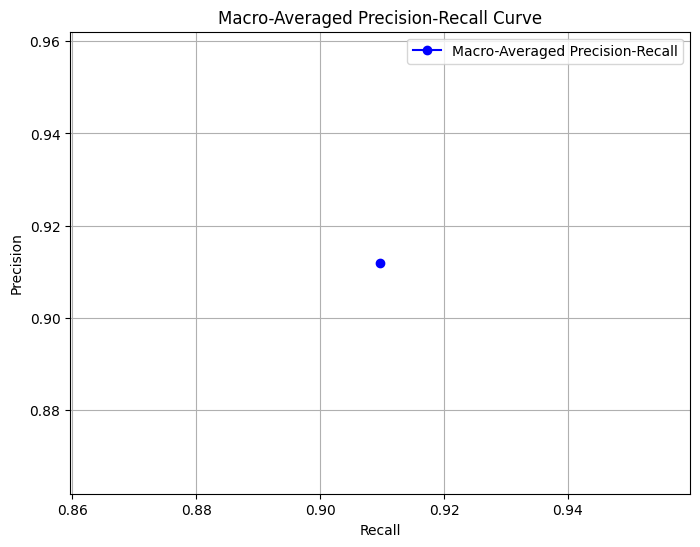

In [13]:
import matplotlib.pyplot as plt

# Plot Macro-Averaged Precision and Macro-Averaged Recall
plt.figure(figsize=(8, 6))
plt.plot([macro_recall], [macro_precision], marker='o', color='blue', label='Macro-Averaged Precision-Recall', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **DenseNet169**

In [ ]:
# densenet169 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet169_model.h5')

In [ ]:
train_loss, train_accuracy = densenet169.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 204s 265ms/step - loss: 0.0928 - accuracy: 0.9666
Train accuracy: 0.9666


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = densenet169.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 34s 262ms/step - loss: 0.1526 - accuracy: 0.9549
Test accuracy: 0.9549


131/131 [==============================] - 43s 283ms/step


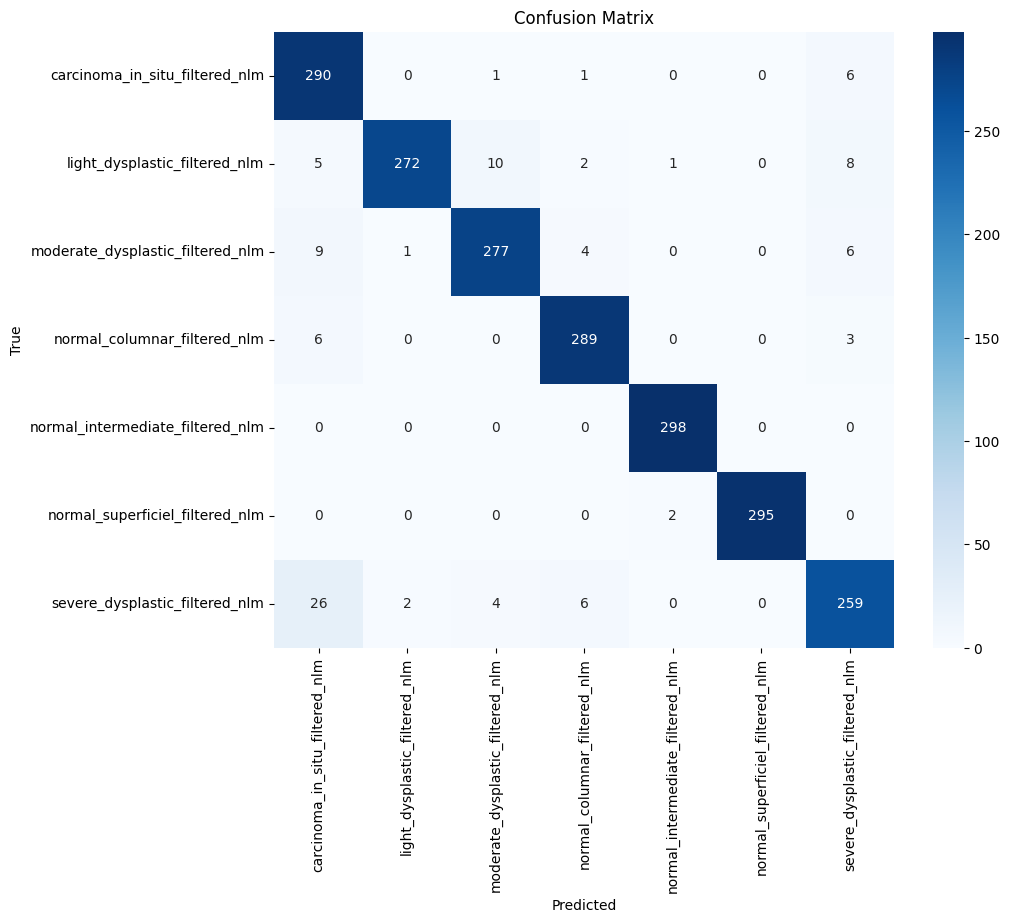

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.863095  0.973154  0.914826
1     light_dysplastic_filtered_nlm   0.989091  0.912752  0.949389
2  moderate_dysplastic_filtered_nlm   0.948630  0.932660  0.940577
3      normal_columnar_filtered_nlm   0.956954  0.969799  0.963333
4  normal_intermediate_filtered_nlm   0.990033  1.000000  0.994992
5   normal_superficiel_filtered_nlm   1.000000  0.993266  0.996622
6    severe_dysplastic_filtered_nlm   0.918440  0.872054  0.894646
True Positives (TP): 272
True Negatives (TN): 290
False Positives (FP): 0
False Negatives (FN): 5
Macro-Averaged Precision: 0.9523204093514248
Macro-Averaged Recall: 0.950526356566625
Macro-Averaged F1 Score: 0.9506264966773641
Average Accuracy: 0.9911816578483245


In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = densenet169.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
tp = cm[1, 1]  # True Positives (assuming positive class is labeled as 1)
tn = cm[0, 0]  # True Negatives (assuming negative class is labeled as 0)
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives

# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)


# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)
# Print TP, TN, FP, and FN values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Print macro-averaged precision, recall, and F1 score
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1 Score:", macro_f1)


average_accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

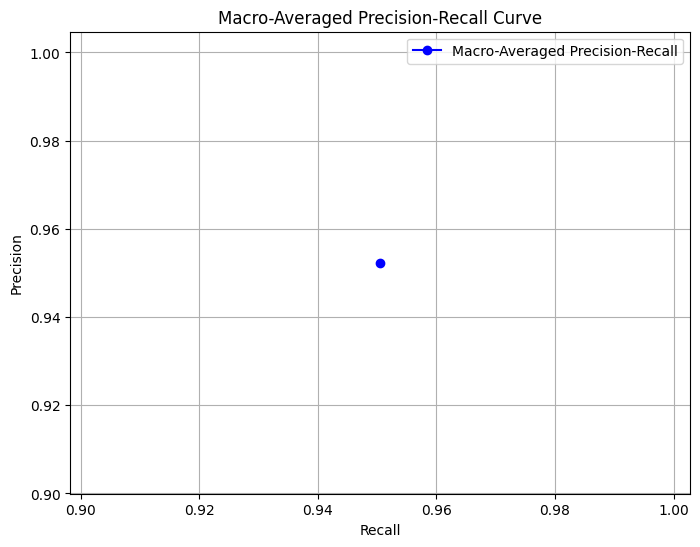

In [15]:
import matplotlib.pyplot as plt

# Plot Macro-Averaged Precision and Macro-Averaged Recall
plt.figure(figsize=(8, 6))
plt.plot([macro_recall], [macro_precision], marker='o', color='blue', label='Macro-Averaged Precision-Recall', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


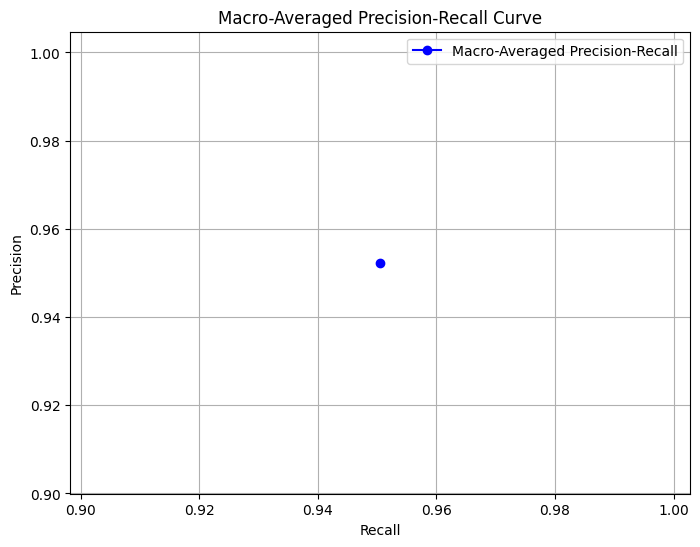

In [16]:
import matplotlib.pyplot as plt

# Plot Macro-Averaged Precision and Macro-Averaged Recall
plt.figure(figsize=(8, 6))
plt.plot([macro_recall], [macro_precision], marker='o', color='blue', label='Macro-Averaged Precision-Recall', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **XceptionNet**

In [ ]:
# xceptionnet = tf.keras.models.load_model('/content/drive/MyDrive/Model/XceptionNet_model.h5')

In [ ]:
train_loss, train_accuracy = xceptionnet.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 200s 262ms/step - loss: 0.0739 - accuracy: 0.9747
Train accuracy: 0.9747


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = xceptionnet.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 35s 270ms/step - loss: 0.1228 - accuracy: 0.9587
Test accuracy: 0.9587


131/131 [==============================] - 34s 248ms/step


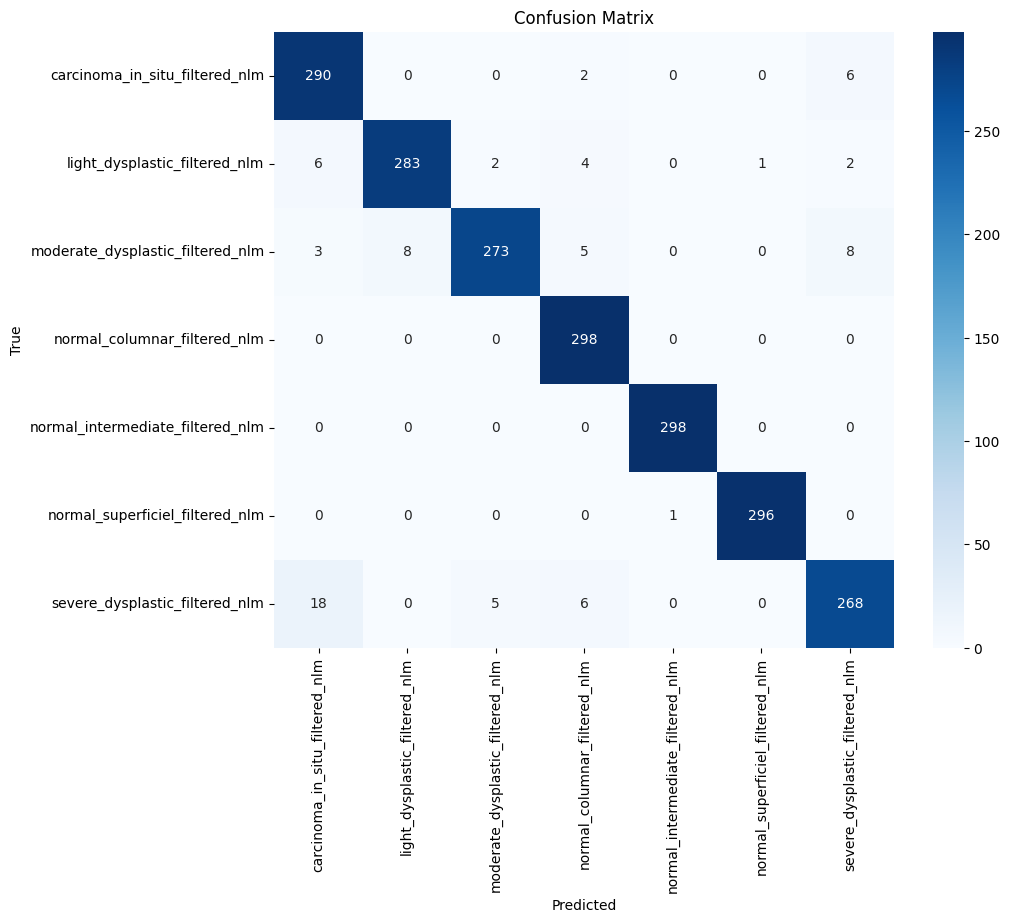

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.914826  0.973154  0.943089
1     light_dysplastic_filtered_nlm   0.972509  0.949664  0.960951
2  moderate_dysplastic_filtered_nlm   0.975000  0.919192  0.946274
3      normal_columnar_filtered_nlm   0.946032  1.000000  0.972268
4  normal_intermediate_filtered_nlm   0.996656  1.000000  0.998325
5   normal_superficiel_filtered_nlm   0.996633  0.996633  0.996633
6    severe_dysplastic_filtered_nlm   0.943662  0.902357  0.922547
True Positives (TP): 283
True Negatives (TN): 290
False Positives (FP): 0
False Negatives (FN): 6
Macro-Averaged Precision: 0.9636167603397688
Macro-Averaged Recall: 0.9630000871611609
Macro-Averaged F1 Score: 0.9628695498149494
Average Accuracy: 0.9896373056994818


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = xceptionnet.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
tp = cm[1, 1]  # True Positives (assuming positive class is labeled as 1)
tn = cm[0, 0]  # True Negatives (assuming negative class is labeled as 0)
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives

# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)

# Print TP, TN, FP, and FN values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Print macro-averaged precision, recall, and F1 score
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1 Score:", macro_f1)

average_accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

# **InceptionResNetV2**

In [ ]:
# inceptionresnetv2  = tf.keras.models.load_model('/content/drive/MyDrive/Model/InceptionResNetV2_model.h5')

In [ ]:
train_loss, train_accuracy = inceptionresnetv2.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 212s 273ms/step - loss: 0.0946 - accuracy: 0.9694
Train accuracy: 0.9694


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = inceptionresnetv2.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 35s 269ms/step - loss: 0.1646 - accuracy: 0.9486
Test accuracy: 0.9486


131/131 [==============================] - 45s 295ms/step


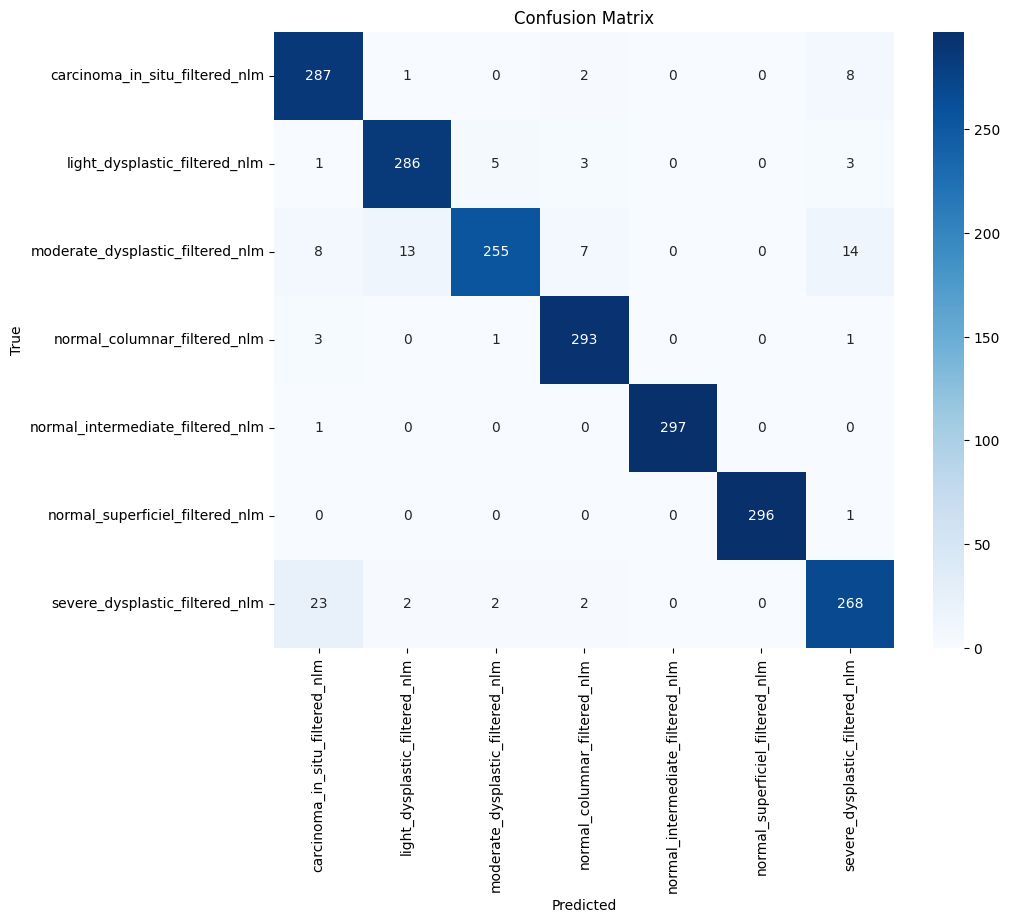

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.888545  0.963087  0.924316
1     light_dysplastic_filtered_nlm   0.947020  0.959732  0.953333
2  moderate_dysplastic_filtered_nlm   0.969582  0.858586  0.910714
3      normal_columnar_filtered_nlm   0.954397  0.983221  0.968595
4  normal_intermediate_filtered_nlm   1.000000  0.996644  0.998319
5   normal_superficiel_filtered_nlm   1.000000  0.996633  0.998314
6    severe_dysplastic_filtered_nlm   0.908475  0.902357  0.905405
True Positives (TP): 286
True Negatives (TN): 287
False Positives (FP): 1
False Negatives (FN): 1
Macro-Averaged Precision: 0.95257406837828
Macro-Averaged Recall: 0.9514657601905924
Macro-Averaged F1 Score: 0.9512852389762022
Average Accuracy: 0.9965217391304347


In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = inceptionresnetv2.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

tp = cm[1, 1]  # True Positives (assuming positive class is labeled as 1)
tn = cm[0, 0]  # True Negatives (assuming negative class is labeled as 0)
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives

# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Calculate macro-averaged precision, recall, and F1 score
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)

# Print TP, TN, FP, and FN values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Print macro-averaged precision, recall, and F1 score
print("Macro-Averaged Precision:", macro_precision)
print("Macro-Averaged Recall:", macro_recall)
print("Macro-Averaged F1 Score:", macro_f1)

average_accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

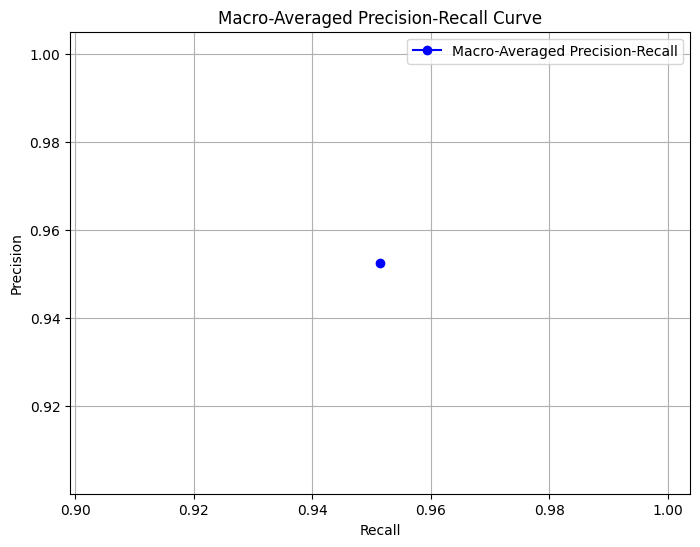

In [18]:
import matplotlib.pyplot as plt

# Plot Macro-Averaged Precision and Macro-Averaged Recall
plt.figure(figsize=(8, 6))
plt.plot([macro_recall], [macro_precision], marker='o', color='blue', label='Macro-Averaged Precision-Recall', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 28ms/step
Model: ResNet50V2
Predicted Class: normal_intermediate, Probability: 100.00%
Non-cancerous



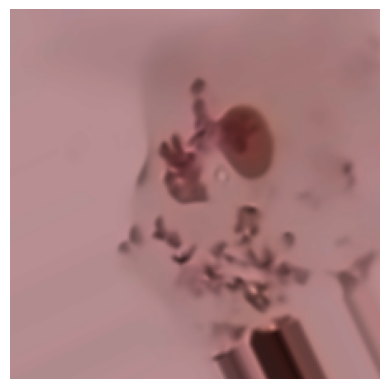

1/1 [==============================] - 0s 30ms/step
Model: ResNet101
Predicted Class: normal_intermediate, Probability: 100.00%
Non-cancerous



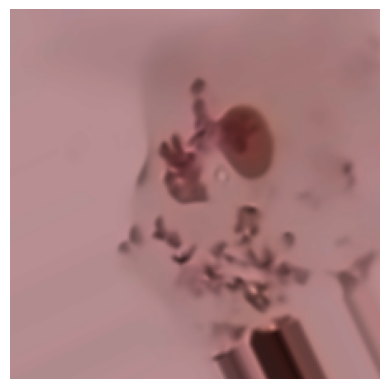

1/1 [==============================] - 0s 33ms/step
Model: DenseNet121
Predicted Class: normal_intermediate, Probability: 100.00%
Non-cancerous



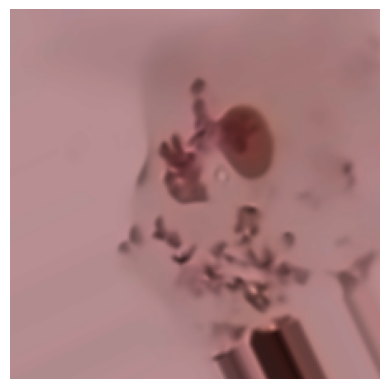

1/1 [==============================] - 0s 36ms/step
Model: DenseNet169
Predicted Class: normal_intermediate, Probability: 100.00%
Non-cancerous



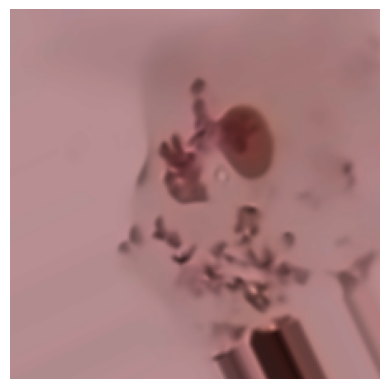

1/1 [==============================] - 0s 24ms/step
Model: XceptionNet
Predicted Class: normal_intermediate, Probability: 100.00%
Non-cancerous



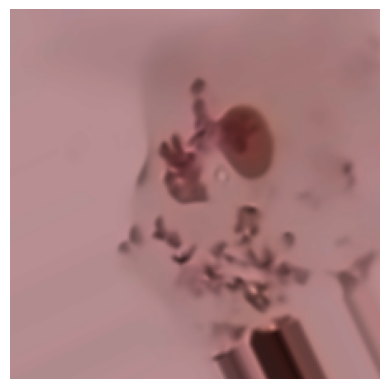

1/1 [==============================] - 0s 41ms/step
Model: InceptionResNetV2
Predicted Class: normal_intermediate, Probability: 99.99%
Non-cancerous



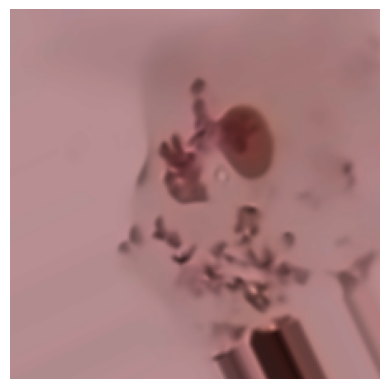

Final Prediction (Majority Voting): normal_intermediate, chances: 100.00%


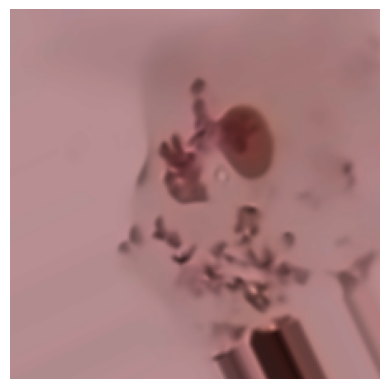

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

# Function to preprocess image for model input
def preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    return image

# Define the determine_cancerous function
def determine_cancerous(class_name):
    cancerous_classes = {
        'carcinoma_in_situ': True,
        'light_dysplastic': True,
        'moderate_dysplastic': True,
        'normal_columnar': False,
        'normal_intermediate': False,
        'normal_superficiel': False,
        'severe_dysplastic': True,
    }

    return cancerous_classes.get(class_name, None)


# Assuming you have defined your test image directory
test_image_directory = test_data_dir

# Get a list of subdirectories (class folders)
class_folders = [os.path.join(test_image_directory, class_folder) for class_folder in os.listdir(test_image_directory) if os.path.isdir(os.path.join(test_image_directory, class_folder))]

# Initialize an empty list to store the randomly selected image paths
random_image_paths = []

# Loop through each class folder
for class_folder in class_folders:
    # Get a list of image paths in the class folder
    class_images = [os.path.join(class_folder, filename) for filename in os.listdir(class_folder) ]

    # Check if there are any images in the class folder
    if class_images:
        # Get a random image path
        random_image_path = random.choice(class_images)
        random_image_paths.append(random_image_path)

# Load and preprocess the test image
test_image_path = random.choice(random_image_paths)
test_image = preprocess_image(test_image_path)

# Make predictions for each model
# Assuming you have defined the models and Classes_names

models = [resnet50v2, resnet101, densenet121, densenet169, xceptionnet, inceptionresnetv2]
model_names = ['ResNet50V2', 'ResNet101', 'DenseNet121', 'DenseNet169', 'XceptionNet', 'InceptionResNetV2']

Classes_names=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']

# Initialize an empty list to store the predicted classes
predicted_classes = []

# Loop through each model
for model, model_name in zip(models, model_names):
    preds = model.predict(test_image)
    class_idx = np.argmax(preds)
    class_prob = preds[0, class_idx]
    class_name = Classes_names[class_idx]

    # Determine if the class is cancerous
    is_cancerous = determine_cancerous(class_name)

    # Display the predicted class, probability, and cancerous status
    print(f'Model: {model_name}')
    print(f'Predicted Class: {class_name}, Probability: {class_prob*100:.2f}%')

    # Print whether it's cancerous or not
    if is_cancerous is not None:
        if is_cancerous:
            print('Cancerous')
        else:
            print('Non-cancerous')
    else:
        print('Class not found in dictionary')

    print()

    predicted_classes.append(class_name)

    # Display the image
    plt.imshow(tf.keras.preprocessing.image.load_img(test_image_path))
    plt.axis('off')
    plt.show()

# Convert class names to indices
class_indices = [Classes_names.index(class_name) for class_name in predicted_classes]

# Apply majority voting
majority_class_idx = np.argmax(np.bincount(class_indices))
chances = class_indices.count(majority_class_idx) / len(class_indices) * 100
majority_class_name = Classes_names[majority_class_idx]

# Display the final prediction
print(f'Final Prediction (Majority Voting): {majority_class_name}, chances: {chances:.2f}%')

# Display the final image
plt.imshow(tf.keras.preprocessing.image.load_img(test_image_path))
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 41ms/step
Model: ResNet50V2
Predicted Class: moderate_dysplastic, Probability: 99.95%
Cancerous



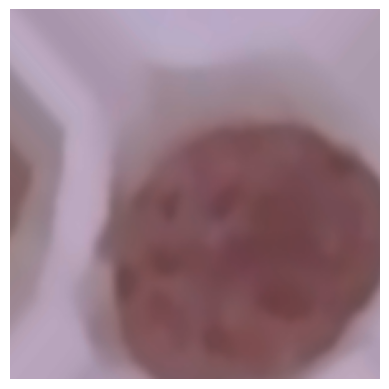

1/1 [==============================] - 0s 65ms/step
Model: ResNet101
Predicted Class: moderate_dysplastic, Probability: 99.93%
Cancerous



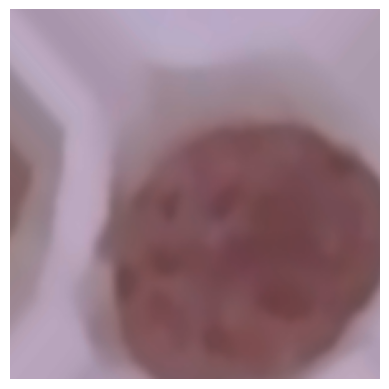

1/1 [==============================] - 0s 55ms/step
Model: DenseNet121
Predicted Class: moderate_dysplastic, Probability: 97.14%
Cancerous



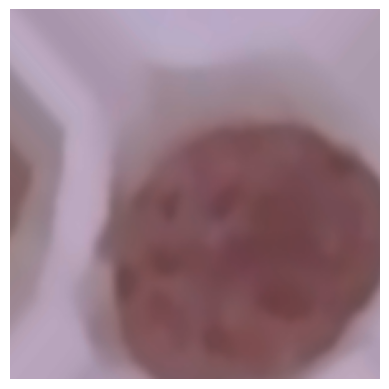

1/1 [==============================] - 0s 60ms/step
Model: DenseNet169
Predicted Class: moderate_dysplastic, Probability: 99.96%
Cancerous



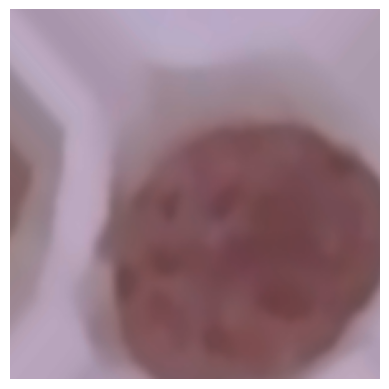

1/1 [==============================] - 0s 44ms/step
Model: XceptionNet
Predicted Class: moderate_dysplastic, Probability: 100.00%
Cancerous



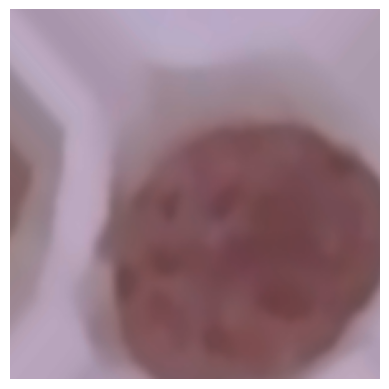

1/1 [==============================] - 0s 75ms/step
Model: InceptionResNetV2
Predicted Class: moderate_dysplastic, Probability: 99.75%
Cancerous



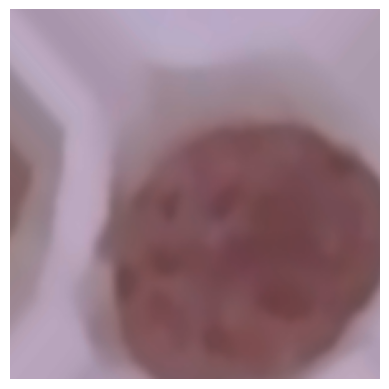

Final Prediction (Majority Voting): moderate_dysplastic, chances: 100.00%


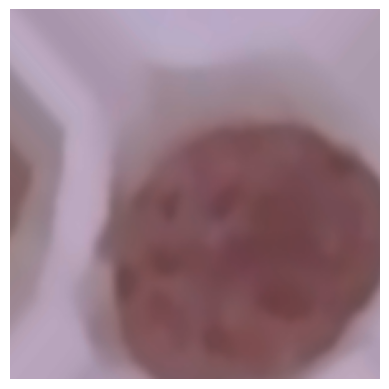

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow as tf

# Function to preprocess image for model input
def preprocess_image(image_path):
    # Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    return image

# Define the determine_cancerous function
def determine_cancerous(class_name):
    cancerous_classes = {
        'carcinoma_in_situ': True,
        'light_dysplastic': True,
        'moderate_dysplastic': True,
        'normal_columnar': False,
        'normal_intermediate': False,
        'normal_superficiel': False,
        'severe_dysplastic': True,
    }

    return cancerous_classes.get(class_name, None)

# Assuming you have defined your test image path
test_image_path = '/content/cervix-cancer-Deep-learning/NEW_DATASET/test/moderate_dysplastic_filtered_nlm/153698259-153698268-002_filtered_5.png'

# Load and preprocess the test image
test_image = preprocess_image(test_image_path)

# Make predictions for each model
# Assuming you have defined the models and Classes_names

models = [resnet50v2, resnet101, densenet121, densenet169, xceptionnet, inceptionresnetv2]
model_names = ['ResNet50V2', 'ResNet101', 'DenseNet121', 'DenseNet169', 'XceptionNet', 'InceptionResNetV2']

Classes_names=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']

predicted_classes = []

for model, model_name in zip(models, model_names):
    preds = model.predict(test_image)
    class_idx = np.argmax(preds)
    class_prob = preds[0, class_idx]
    class_name = Classes_names[class_idx]
    # class_name = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(class_idx)]

    # Determine if the class is cancerous
    is_cancerous = determine_cancerous(class_name)

    # Display the predicted class, probability, and cancerous status
    print(f'Model: {model_name}')
    print(f'Predicted Class: {class_name}, Probability: {class_prob*100:.2f}%')

    # Print whether it's cancerous or not
    if is_cancerous is not None:
        if is_cancerous:
            print('Cancerous')
        else:
            print('Non-cancerous')
    else:
        print('Class not found in dictionary')

    print()

    predicted_classes.append(class_name)

    # Display the image
    plt.imshow(tf.keras.preprocessing.image.load_img(test_image_path))
    plt.axis('off')
    plt.show()

# Convert class names to indices
class_indices = [Classes_names.index(class_name) for class_name in predicted_classes]
# class_indices = [test_generator.class_indices[class_name] for class_name in predicted_classes]

# Apply majority voting
majority_class_idx = np.argmax(np.bincount(class_indices))
chances = class_indices.count(majority_class_idx) / len(class_indices) * 100
majority_class_name = Classes_names[majority_class_idx]
# majority_class_name = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(majority_class_idx)]


# Display the final prediction
print(f'Final Prediction (Majority Voting): {majority_class_name}, chances: {chances:.2f}%')

# Display the final image
plt.imshow(tf.keras.preprocessing.image.load_img(test_image_path))
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 44ms/step
Model: ResNet50V2
Predicted Class: severe_dysplastic, Probability: 98.38%



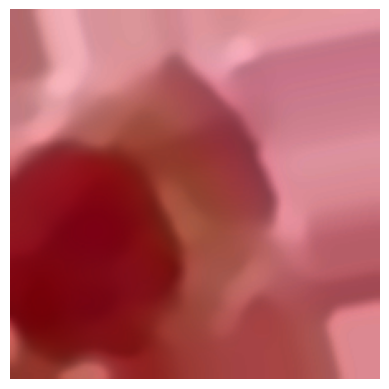

1/1 [==============================] - 0s 51ms/step
Model: ResNet101
Predicted Class: normal_columnar, Probability: 76.94%



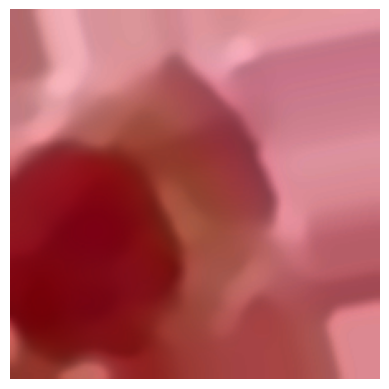

1/1 [==============================] - 0s 52ms/step
Model: DenseNet121
Predicted Class: severe_dysplastic, Probability: 97.16%



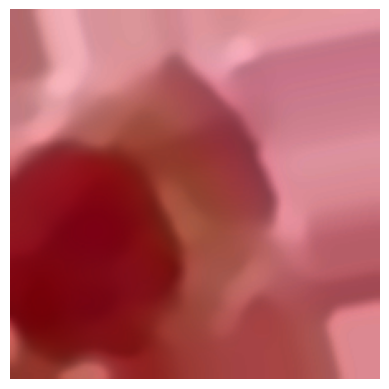

1/1 [==============================] - 0s 77ms/step
Model: DenseNet169
Predicted Class: normal_columnar, Probability: 99.94%



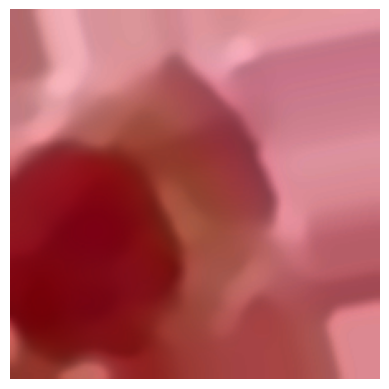

1/1 [==============================] - 0s 69ms/step
Model: XceptionNet
Predicted Class: normal_columnar, Probability: 99.98%



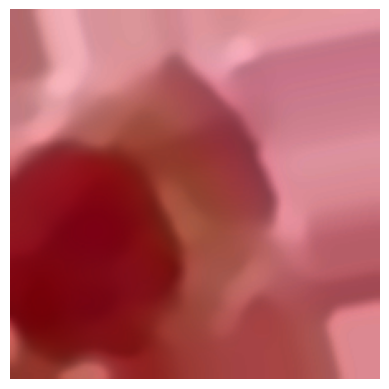

1/1 [==============================] - 0s 81ms/step
Model: InceptionResNetV2
Predicted Class: normal_columnar, Probability: 82.86%



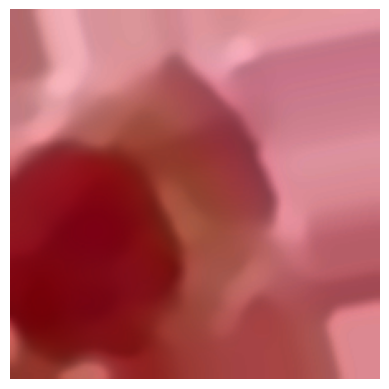

Final Prediction (Majority Voting): normal_columnar, Chances: 66.67%


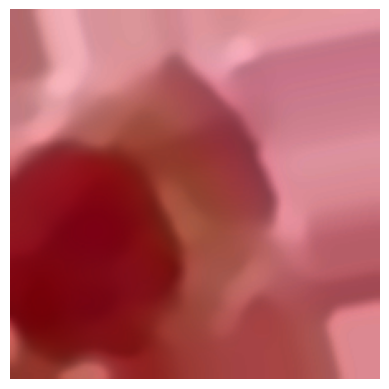

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications.resnet_v2 import preprocess_input
# import cv2

# def nlm_filter(image):
#     filtered_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
#     return filtered_image

# # List of models and their corresponding names
# models = [resnet50v2, resnet101, densenet121, densenet169, xceptionnet, inceptionresnetv2]
# model_names = ['ResNet50V2', 'ResNet101', 'DenseNet121', 'DenseNet169', 'XceptionNet', 'InceptionResNetV2']

# Classes_names=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']

# # Replace with your actual image path
# image_path = '/content/cervix-cancer-Deep-learning/NEW_DATASET/test/normal_columnar_filtered_nlm/augmented_0_3575.png'
# img = cv2.imread(image_path)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Apply NLM filter
# img_rgb_filtered = nlm_filter(img_rgb)

# predicted_classes = []

# # Loop through models
# for model, model_name in zip(models, model_names):
#     preds = model.predict(preprocess_input(np.expand_dims(img_rgb_filtered, axis=0)))
#     class_idx = np.argmax(preds)
#     class_prob = preds[0, class_idx]
#     class_name = Classes_names[class_idx]

#     # Display the predicted class and probability
#     print(f'Model: {model_name}')
#     print(f'Predicted Class: {class_name}, Probability: {class_prob*100:.2f}%')
#     print()

#     predicted_classes.append(class_name)

#     # Display the image
#     plt.imshow(img_rgb_filtered)
#     plt.axis('off')
#     plt.show()

# # Convert class names to indices
# class_indices = [Classes_names.index(class_name) for class_name in predicted_classes]

# # Apply majority voting
# majority_class_idx = np.argmax(np.bincount(class_indices))
# chances = class_indices.count(majority_class_idx) / len(class_indices) * 100
# majority_class_name = Classes_names[majority_class_idx]

# # Display the final prediction
# print(f'Final Prediction (Majority Voting): {majority_class_name}, Chances: {chances:.2f}%')

# # Display the final image
# plt.imshow(img_rgb_filtered)
# plt.axis('off')
# plt.show()
